In [48]:
!pip install yfinance pandas numpy matplotlib seaborn statsmodels prophet scikit-learn
!pip install --upgrade plotly
!pip install --upgrade yfinance

In [49]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import MinMaxScaler

In [50]:

!pip install yfinance statsmodels --quiet


nse_stocks = {
    "RELIANCE.NS": "Energy",
    "TCS.NS": "IT",
    "HDFCBANK.NS": "Banking",
    "INFY.NS": "IT",
    "ICICIBANK.NS": "Banking",
    "HINDUNILVR.NS": "FMCG",
    "KOTAKBANK.NS": "Banking",
    "LT.NS": "Infrastructure",
    "ASIANPAINT.NS": "Consumer",
    "MARUTI.NS": "Auto",
    "BAJFINANCE.NS": "NBFC",
    "TITAN.NS": "Retail",
    "SUNPHARMA.NS": "Pharma",
    "ULTRACEMCO.NS": "Construction",
    "WIPRO.NS": "IT",
}

data_dict = {}
for symbol in nse_stocks:
    data = yf.download(symbol, start="2020-01-01", end="2024-12-31")
    if not data.empty:
        data["Log Return"] = np.log(data["Close"] / data["Close"].shift(1))
        data["Rolling Std"] = data["Log Return"].rolling(window=20).std()
        data_dict[symbol] = data


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [51]:

volatility_scores = {}
trend_strengths = {}

for symbol, df in data_dict.items():

    volatility_scores[symbol] = df["Rolling Std"].mean()
    try:
        decomposition = seasonal_decompose(df["Close"].dropna(), model='additive', period=30)
        trend_strength = (decomposition.trend.dropna().std() / df["Close"].std()).item()
        trend_strengths[symbol] = trend_strength
    except:
        trend_strengths[symbol] = 0


summary_df = pd.DataFrame({
    "Sector": nse_stocks,
    "Avg Volatility": volatility_scores,
    "Trend Strength": trend_strengths
}).sort_values(by="Avg Volatility", ascending=False)

summary_df


,Sector,Avg Volatility,Trend Strength
BAJFINANCE.NS,NBFC,0.020957,0.981493
WIPRO.NS,IT,0.016984,0.973474
ICICIBANK.NS,Banking,0.016951,0.976779
TITAN.NS,Retail,0.016722,0.987270
LT.NS,Infrastructure,0.016583,0.983963
KOTAKBANK.NS,Banking,0.016443,0.958150
MARUTI.NS,Auto,0.016418,0.990041
RELIANCE.NS,Energy,0.016409,0.974187
INFY.NS,IT,0.015984,0.958513
ULTRACEMCO.NS,Construction,0.015868,0.972526


In [52]:

top_vol = summary_df.sort_values("Avg Volatility", ascending=False).head(7)
top_trend = summary_df.sort_values("Trend Strength", ascending=False).head(7)

final_selection = pd.concat([top_vol, top_trend]).drop_duplicates().reset_index()


selected_stocks = []
selected_sectors = set()
for _, row in final_selection.iterrows():
    if row["Sector"] not in selected_sectors:
        selected_stocks.append(row["index"])
        selected_sectors.add(row["Sector"])
    if len(selected_stocks) >= 8:
        break

selected_stocks


['BAJFINANCE.NS',
 'WIPRO.NS',
 'ICICIBANK.NS',
 'TITAN.NS',
 'LT.NS',
 'MARUTI.NS',
 'RELIANCE.NS']

In [53]:
stock_data = {}

for symbol in selected_stocks:
    print(f"Downloading data for {symbol}...")
    df = yf.download(symbol, start="2020-01-01", end="2024-12-31", auto_adjust=False)


    if df.empty:
        print(f" No data found for {symbol}, skipping.")
        continue


    df = df[["Close"]].rename(columns={"Close": "Price"})

    df.index = pd.to_datetime(df.index)

    df["Price"] = df["Price"].ffill().bfill()

    df = df.loc[:, ~df.columns.duplicated()]
    df.columns = ["Price"]



    stock_data[symbol] = df
    print(f"{symbol} loaded with {len(df)} records.")


print("\nLoaded stocks:", list(stock_data.keys()))
stock_data

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

BAJFINANCE.NS loaded with 1237 records.
WIPRO.NS loaded with 1237 records.
ICICIBANK.NS loaded with 1237 records.



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


TITAN.NS loaded with 1237 records.
LT.NS loaded with 1237 records.
MARUTI.NS loaded with 1237 records.
RELIANCE.NS loaded with 1237 records.

Loaded stocks: ['BAJFINANCE.NS', 'WIPRO.NS', 'ICICIBANK.NS', 'TITAN.NS', 'LT.NS', 'MARUTI.NS', 'RELIANCE.NS']


{'BAJFINANCE.NS':                   Price
 Date                   
 2020-01-01  4231.299805
 2020-01-02  4246.049805
 2020-01-03  4193.450195
 2020-01-06  3996.699951
 2020-01-07  4007.649902
 ...                 ...
 2024-12-23  6866.700195
 2024-12-24  6808.200195
 2024-12-26  6815.750000
 2024-12-27  6907.750000
 2024-12-30  6888.250000
 
 [1237 rows x 1 columns],
 'WIPRO.NS':                  Price
 Date                  
 2020-01-01  123.849998
 2020-01-02  124.150002
 2020-01-03  125.550003
 2020-01-06  126.074997
 2020-01-07  127.599998
 ...                ...
 2024-12-23  307.899994
 2024-12-24  305.299988
 2024-12-26  305.049988
 2024-12-27  309.100006
 2024-12-30  303.700012
 
 [1237 rows x 1 columns],
 'ICICIBANK.NS':                   Price
 Date                   
 2020-01-01   536.750000
 2020-01-02   540.599976
 2020-01-03   538.849976
 2020-01-06   525.700012
 2020-01-07   522.900024
 ...                 ...
 2024-12-23  1296.800049
 2024-12-24  1297.250000
 2024-12-26 

In [54]:
cleaned_stock_data = {}

for symbol, df in stock_data.items():

    df = df.reset_index()

    if "Ticker" in df.columns:
        df = df.drop(columns=["Ticker"])

    df = df.set_index("Date")
    df = df.sort_index()
    df["Price"] = df["Price"].ffill().bfill()

    cleaned_stock_data[symbol] = df

cleaned_stock_data['BAJFINANCE.NS']

,Price
Date,
2020-01-01,4231.299805
2020-01-02,4246.049805
2020-01-03,4193.450195
2020-01-06,3996.699951
2020-01-07,4007.649902
...,...
2024-12-23,6866.700195
2024-12-24,6808.200195
2024-12-26,6815.750000


In [55]:
from statsmodels.tsa.stattools import adfuller

differenced_data = {}

def check_stationarity(series, name):
    result = adfuller(series.dropna())
    print(f"{name}: ADF p-value = {result[1]:.4f}")
    return result[1] <= 0.05

for symbol, df in cleaned_stock_data.items():
    df = df.copy()
    is_stationary = check_stationarity(df["Price"], symbol)

    if is_stationary:
        df["Target"] = df["Price"]
    else:
        df["Diff"] = df["Price"].diff()
        df = df.dropna(subset=["Diff"])
        df["Target"] = df["Diff"]

    differenced_data[symbol] = df
differenced_data['BAJFINANCE.NS']

BAJFINANCE.NS: ADF p-value = 0.4841
WIPRO.NS: ADF p-value = 0.6175
ICICIBANK.NS: ADF p-value = 0.9545
TITAN.NS: ADF p-value = 0.7167


<ipython-input-55-a47fc2009397>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Target"] = df["Diff"]
<ipython-input-55-a47fc2009397>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Target"] = df["Diff"]


LT.NS: ADF p-value = 0.9698
MARUTI.NS: ADF p-value = 0.7207
RELIANCE.NS: ADF p-value = 0.3051


<ipython-input-55-a47fc2009397>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Target"] = df["Diff"]
<ipython-input-55-a47fc2009397>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Target"] = df["Diff"]


,Price,Diff,Target
Date,,,
2020-01-02,4246.049805,14.750000,14.750000
2020-01-03,4193.450195,-52.599609,-52.599609
2020-01-06,3996.699951,-196.750244,-196.750244
2020-01-07,4007.649902,10.949951,10.949951
2020-01-08,4049.949951,42.300049,42.300049
...,...,...,...
2024-12-23,6866.700195,18.450195,18.450195
2024-12-24,6808.200195,-58.500000,-58.500000
2024-12-26,6815.750000,7.549805,7.549805


In [56]:
scalers = {}
scaled_data = {}

for symbol, df in differenced_data.items():
    scaler = MinMaxScaler()
    values = df[["Diff" if "Diff" in df else "Price"]].values
    scaled = scaler.fit_transform(values)
    df["Scaled"] = scaled
    scalers[symbol] = scaler
    scaled_data[symbol] = df


<ipython-input-56-f3887a774a21>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Scaled"] = scaled


In [57]:
from datetime import timedelta

train_test_split = {}

for symbol, df in scaled_data.items():
    split_date = df.index.max() - pd.DateOffset(months=6)
    train = df[df.index <= split_date]
    test = df[df.index > split_date]
    train_test_split[symbol] = (train, test)
    print(f"{symbol}: Train = {train.shape}, Test = {test.shape}")


BAJFINANCE.NS: Train = (1111, 4), Test = (125, 4)
WIPRO.NS: Train = (1111, 4), Test = (125, 4)
ICICIBANK.NS: Train = (1111, 4), Test = (125, 4)
TITAN.NS: Train = (1111, 4), Test = (125, 4)
LT.NS: Train = (1111, 4), Test = (125, 4)
MARUTI.NS: Train = (1111, 4), Test = (125, 4)
RELIANCE.NS: Train = (1111, 4), Test = (125, 4)


In [85]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
import numpy as np

arima_forecasts = {}

for symbol, (train, test) in train_test_split.items():
    print(f"\n ARIMA for {symbol}")

    try:
        model = ARIMA(train["Target"], order=(5,1,0))
        model_fit = model.fit()
        forecast = model_fit.forecast(steps=2)

        actual = test["Target"].iloc[:2].values
        mape = mean_absolute_percentage_error(actual, forecast)
        rmse = np.sqrt(mean_squared_error(actual, forecast))

        print(f"MAPE: {mape:.4f}, RMSE: {rmse:.2f}")
        arima_forecasts[symbol] = (forecast, actual)

    except Exception as e:
        print(f"ARIMA failed for {symbol}: {e}")



 ARIMA for BAJFINANCE.NS


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

MAPE: 1.0392, RMSE: 145.69

 ARIMA for WIPRO.NS


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/

MAPE: 0.6568, RMSE: 3.90

 ARIMA for ICICIBANK.NS


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/

MAPE: 0.8760, RMSE: 23.24

 ARIMA for TITAN.NS


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/

MAPE: 1.1495, RMSE: 33.79

 ARIMA for LT.NS


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/

MAPE: 0.9006, RMSE: 68.19

 ARIMA for MARUTI.NS
MAPE: 0.8685, RMSE: 72.08

 ARIMA for RELIANCE.NS
MAPE: 3.0447, RMSE: 15.64


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [59]:
!pip install prophet --quiet

In [60]:

from prophet import Prophet

prophet_forecasts = {}

for symbol, (train, test) in train_test_split.items():
    print(f"\n🔮 Prophet for {symbol}")

    try:
        df_train = train.reset_index()[["Date", "Target"]]
        df_train.columns = ["ds", "y"]

        model = Prophet()
        model.fit(df_train)

        future = model.make_future_dataframe(periods=2)
        forecast = model.predict(future)

        pred = forecast["yhat"].iloc[-2:].values
        actual = test["Target"].iloc[:2].values

        mape = mean_absolute_percentage_error(actual, pred)
        rmse = np.sqrt(mean_squared_error(actual, pred))

        print(f"MAPE: {mape:.4f}, RMSE: {rmse:.2f}")
        prophet_forecasts[symbol] = (pred, actual)

    except Exception as e:
        print(f" Prophet failed for {symbol}: {e}")


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4xmghfx5/fqj1nsft.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4xmghfx5/j8tpixhp.json
DEBUG:cmdstanpy:idx 0



🔮 Prophet for BAJFINANCE.NS


DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43521', 'data', 'file=/tmp/tmp4xmghfx5/fqj1nsft.json', 'init=/tmp/tmp4xmghfx5/j8tpixhp.json', 'output', 'file=/tmp/tmp4xmghfx5/prophet_modellegh7izp/prophet_model-20250514053320.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:33:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:33:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4xmghfx5/8hlvhni3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4xmghfx5/2x71k7ch.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/

MAPE: 1.0543, RMSE: 141.02

🔮 Prophet for WIPRO.NS


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4xmghfx5/3c8h8a7o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4xmghfx5/2iahrrxf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54163', 'data', 'file=/tmp/tmp4xmghfx5/3c8h8a7o.json', 'init=/tmp/tmp4xmghfx5/2iahrrxf.json', 'output', 'file=/tmp/tmp4xmghfx5/prophet_model0p3uu_7g/prophet_model-20250514053322.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:33:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


MAPE: 0.9867, RMSE: 5.78

🔮 Prophet for ICICIBANK.NS


05:33:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4xmghfx5/r0jfezdl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4xmghfx5/pwp0smby.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50263', 'data', 'file=/tmp/tmp4xmghfx5/r0jfezdl.json', 'init=/tmp/tmp4xmghfx5/pwp0smby.json', 'output', 'file=/tmp/tmp4xmghfx5/prophet_modelbby3ud2d/prophet_model-20250514053322.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:33:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:33:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


MAPE: 0.9175, RMSE: 19.79

🔮 Prophet for TITAN.NS


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4xmghfx5/t90x_0hg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4xmghfx5/j27re5h2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3319', 'data', 'file=/tmp/tmp4xmghfx5/t90x_0hg.json', 'init=/tmp/tmp4xmghfx5/j27re5h2.json', 'output', 'file=/tmp/tmp4xmghfx5/prophet_modeld0zseroo/prophet_model-20250514053323.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:33:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


MAPE: 1.0868, RMSE: 32.01

🔮 Prophet for LT.NS


05:33:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4xmghfx5/2xwemyt_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4xmghfx5/iols7jdy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95556', 'data', 'file=/tmp/tmp4xmghfx5/2xwemyt_.json', 'init=/tmp/tmp4xmghfx5/iols7jdy.json', 'output', 'file=/tmp/tmp4xmghfx5/prophet_modelhgm8p8w6/prophet_model-20250514053323.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:33:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


MAPE: 1.0479, RMSE: 57.20

🔮 Prophet for MARUTI.NS


05:33:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4xmghfx5/035iz1_y.json


MAPE: 0.8188, RMSE: 75.28

🔮 Prophet for RELIANCE.NS


DEBUG:cmdstanpy:input tempfile: /tmp/tmp4xmghfx5/yr_78zyq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55829', 'data', 'file=/tmp/tmp4xmghfx5/035iz1_y.json', 'init=/tmp/tmp4xmghfx5/yr_78zyq.json', 'output', 'file=/tmp/tmp4xmghfx5/prophet_model13i4kowf/prophet_model-20250514053324.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:33:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:33:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


MAPE: 1.1069, RMSE: 6.39


In [61]:
!pip install tensorflow --quiet

In [62]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

def build_lstm_model(input_shape):
    model = Sequential([
        LSTM(50, activation='relu', input_shape=input_shape),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

lstm_forecasts = {}

for symbol, (train, test) in train_test_split.items():
    print(f"\n🤖 LSTM for {symbol}")

    try:
        series = train["Target"].values.reshape(-1, 1)
        scaler = MinMaxScaler()
        scaled_series = scaler.fit_transform(series)

        X, y = [], []
        for i in range(len(scaled_series) - 1):
            X.append(scaled_series[i:i+1])
            y.append(scaled_series[i+1])
        X, y = np.array(X), np.array(y)

        model = build_lstm_model((1, 1))
        model.fit(X, y, epochs=10, verbose=0)

        last_input = scaled_series[-1].reshape(1, 1, 1)
        pred1 = model.predict(last_input)
        pred2 = model.predict(pred1.reshape(1, 1, 1))

        pred_scaled = scaler.inverse_transform(np.array([pred1[0][0], pred2[0][0]]).reshape(-1, 1)).flatten()
        actual = test["Target"].iloc[:2].values

        mape = mean_absolute_percentage_error(actual, pred_scaled)
        rmse = np.sqrt(mean_squared_error(actual, pred_scaled))

        print(f"MAPE: {mape:.4f}, RMSE: {rmse:.2f}")
        lstm_forecasts[symbol] = (pred_scaled, actual)

    except Exception as e:
        print(f" LSTM failed for {symbol}: {e}")



🤖 LSTM for BAJFINANCE.NS


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
MAPE: 1.0203, RMSE: 147.48

🤖 LSTM for WIPRO.NS


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
MAPE: 0.9263, RMSE: 5.39

🤖 LSTM for ICICIBANK.NS


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
MAPE: 1.2549, RMSE: 19.20

🤖 LSTM for TITAN.NS


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
MAPE: 0.8847, RMSE: 28.28

🤖 LSTM for LT.NS


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
MAPE: 0.8314, RMSE: 74.36

🤖 LSTM for MARUTI.NS


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
MAPE: 1.1953, RMSE: 101.25

🤖 LSTM for RELIANCE.NS


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
MAPE: 1.8579, RMSE: 13.55


In [63]:
import pandas as pd
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

results = []

def evaluate_model(name, symbol, predicted, actual):
    mape = mean_absolute_percentage_error(actual, predicted)
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    hit_rate = np.mean(np.sign(np.diff(predicted)) == np.sign(np.diff(actual)))
    results.append({
        "Stock": symbol,
        "Model": name,
        "MAPE": mape,
        "RMSE": rmse,
        "HitRate": hit_rate
    })

for symbol in arima_forecasts:
    evaluate_model("ARIMA", symbol, *arima_forecasts[symbol])
for symbol in prophet_forecasts:
    evaluate_model("Prophet", symbol, *prophet_forecasts[symbol])
for symbol in lstm_forecasts:
    evaluate_model("LSTM", symbol, *lstm_forecasts[symbol])

results_df = pd.DataFrame(results)
results_df.head()


,Stock,Model,MAPE,RMSE,HitRate
0,BAJFINANCE.NS,ARIMA,1.039157,145.686619,0.0
1,WIPRO.NS,ARIMA,0.656819,3.896847,0.0
2,ICICIBANK.NS,ARIMA,0.876028,23.235933,0.0
3,TITAN.NS,ARIMA,1.149495,33.786548,0.0
4,LT.NS,ARIMA,0.900632,68.188044,1.0


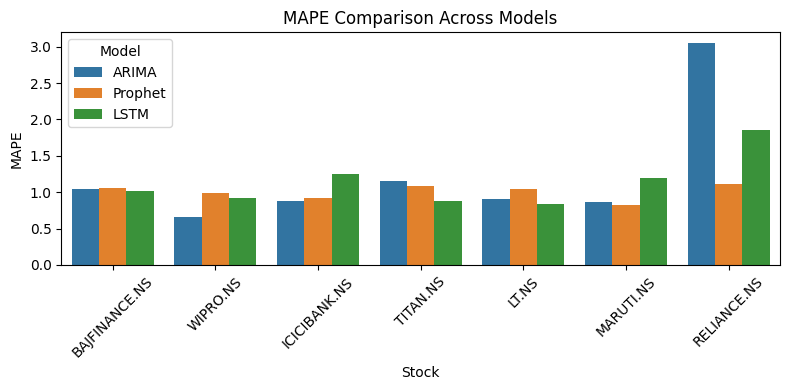

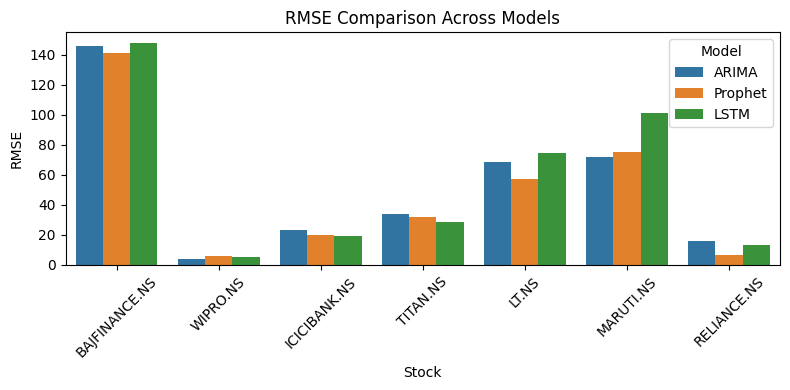

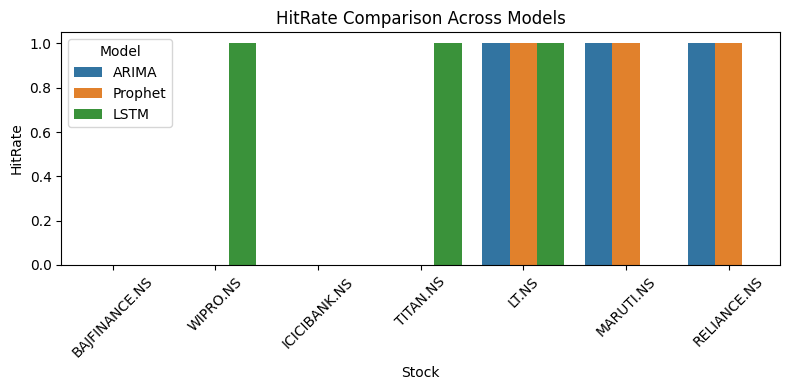

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_metric(metric_name):
    plt.figure(figsize=(8, 4))
    sns.barplot(data=results_df, x="Stock", y=metric_name, hue="Model")
    plt.title(f"{metric_name} Comparison Across Models")
    plt.ylabel(metric_name)
    plt.xlabel("Stock")
    plt.xticks(rotation=45)
    plt.legend(title="Model")
    plt.tight_layout()
    plt.show()

plot_metric("MAPE")
plot_metric("RMSE")
plot_metric("HitRate")


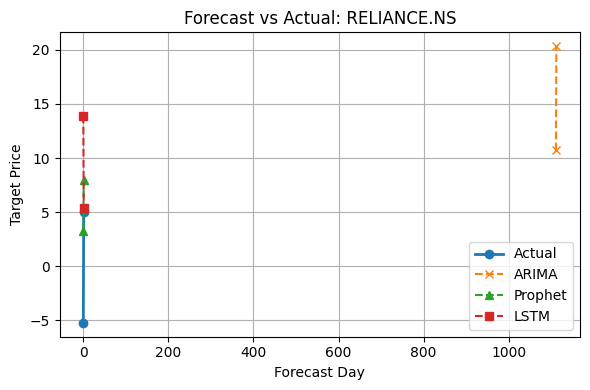

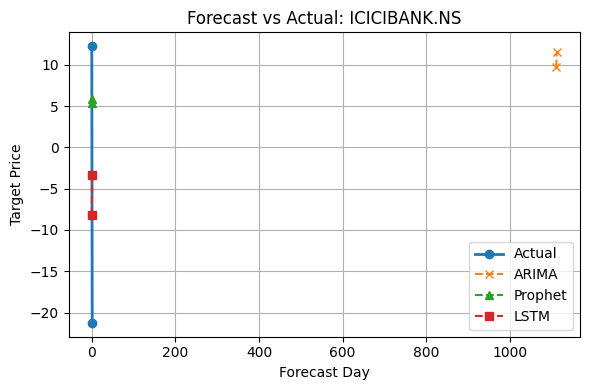

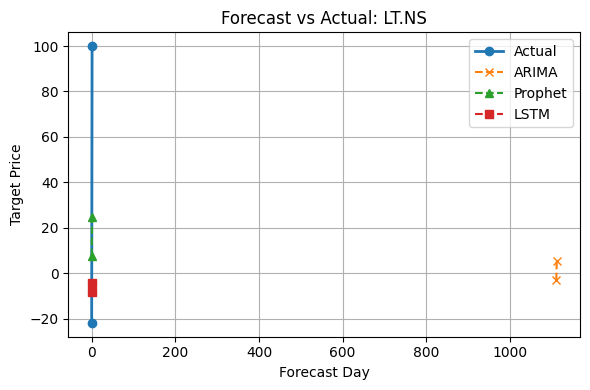

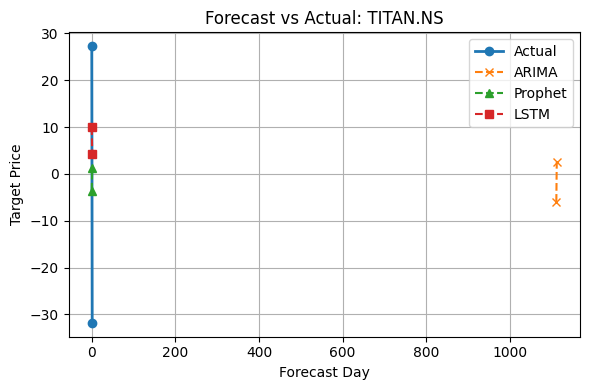

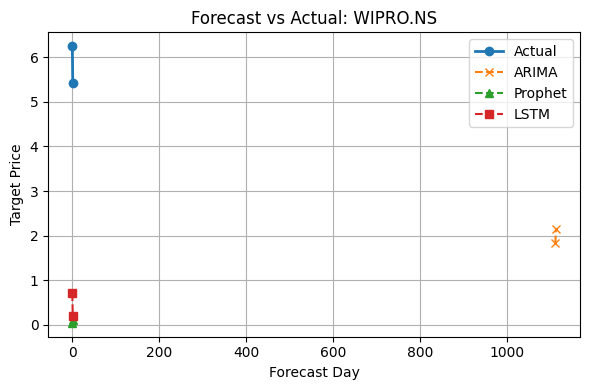

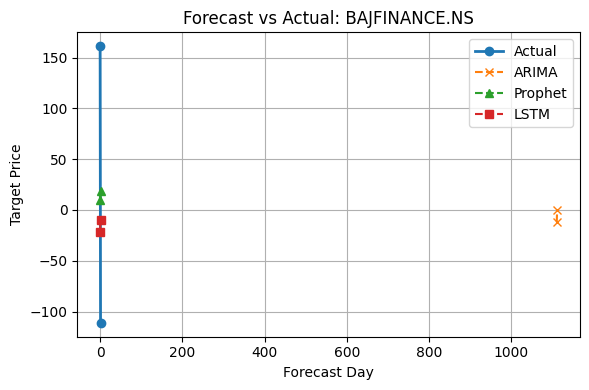

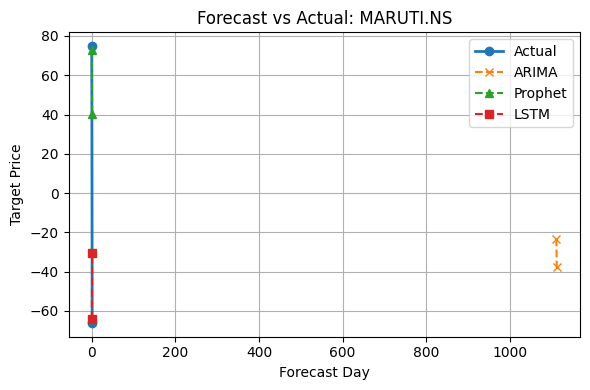

In [65]:
import matplotlib.pyplot as plt

all_symbols = list(set(arima_forecasts) & set(prophet_forecasts) & set(lstm_forecasts))

for symbol in all_symbols:
    actual = arima_forecasts[symbol][1]

    plt.figure(figsize=(6, 4))
    plt.plot(actual, label="Actual", marker='o', linewidth=2)

    if symbol in arima_forecasts:
        plt.plot(arima_forecasts[symbol][0], label="ARIMA", linestyle='--', marker='x')
    if symbol in prophet_forecasts:
        plt.plot(prophet_forecasts[symbol][0], label="Prophet", linestyle='--', marker='^')
    if symbol in lstm_forecasts:
        plt.plot(lstm_forecasts[symbol][0], label="LSTM", linestyle='--', marker='s')

    plt.title(f"Forecast vs Actual: {symbol}")
    plt.xlabel("Forecast Day")
    plt.ylabel("Target Price")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


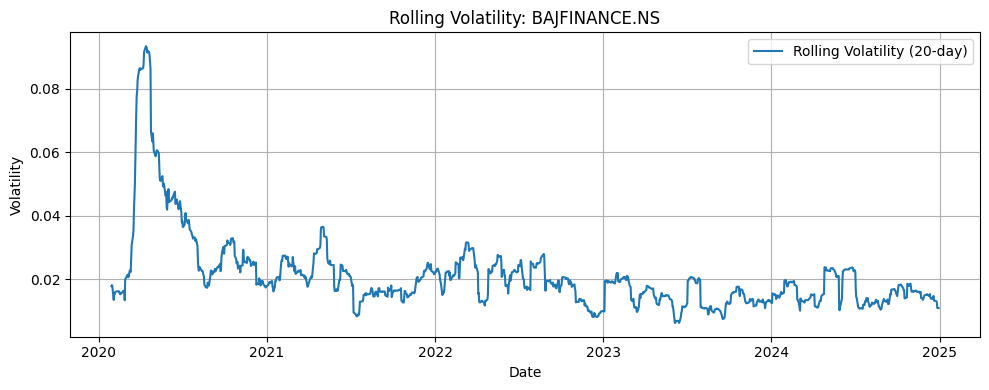

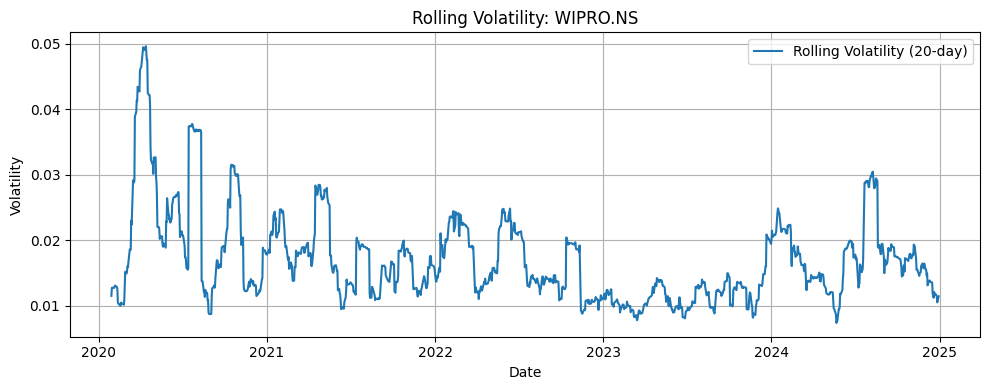

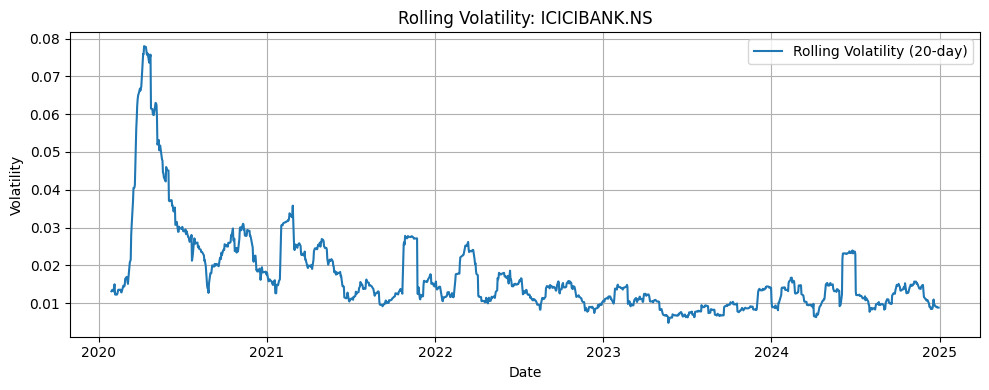

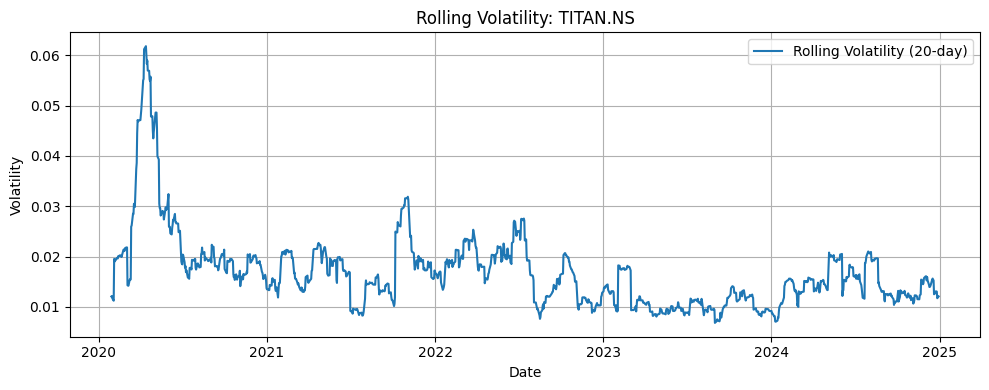

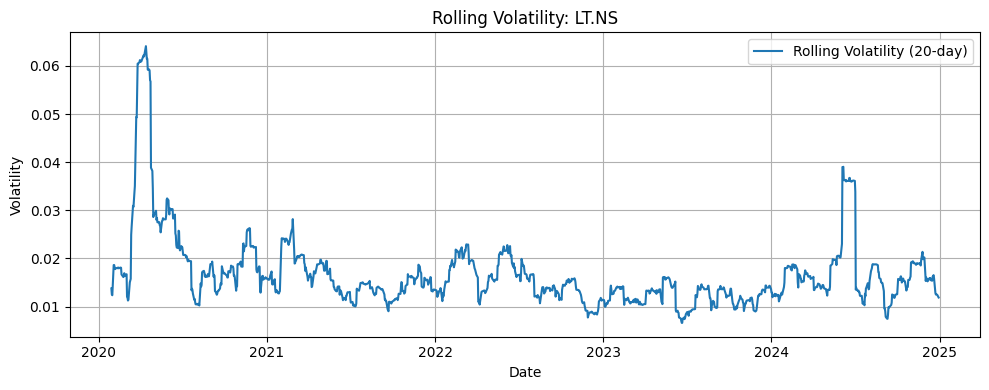

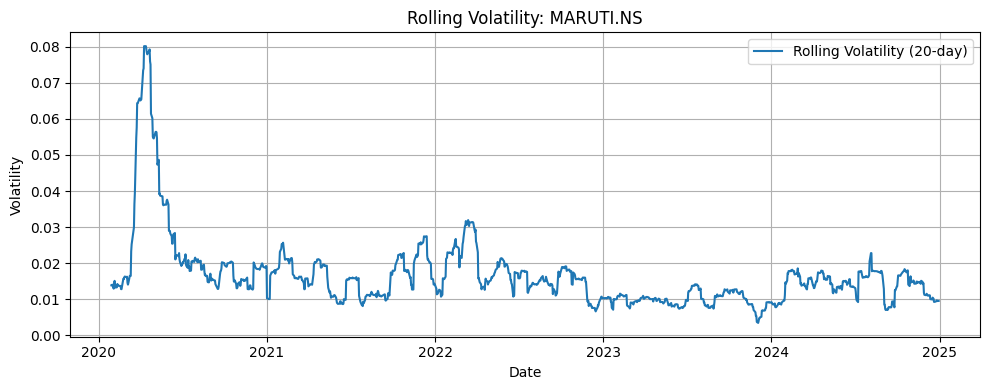

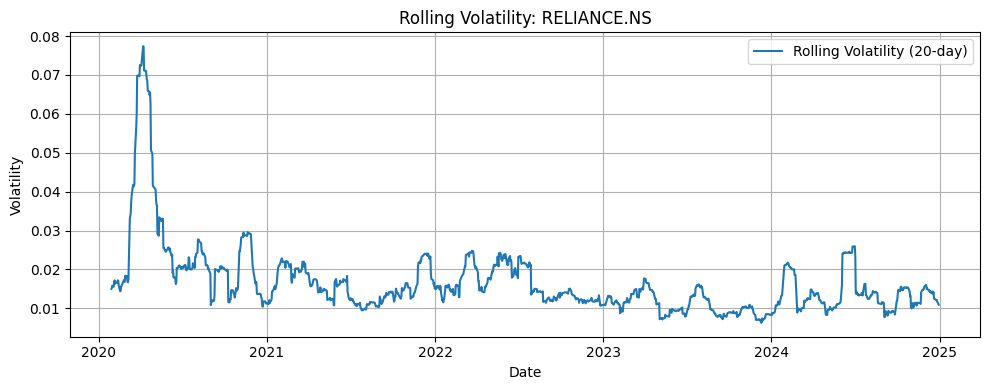

In [66]:
import numpy as np
import matplotlib.pyplot as plt

volatility_data = {}

for symbol, df in cleaned_stock_data.items():
    df = df.copy()
    df["Log Return"] = np.log(df["Price"] / df["Price"].shift(1))
    df["Rolling Volatility"] = df["Log Return"].rolling(window=20).std()
    volatility_data[symbol] = df

    plt.figure(figsize=(10, 4))
    plt.plot(df["Rolling Volatility"], label="Rolling Volatility (20-day)")
    plt.title(f"Rolling Volatility: {symbol}")
    plt.xlabel("Date")
    plt.ylabel("Volatility")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


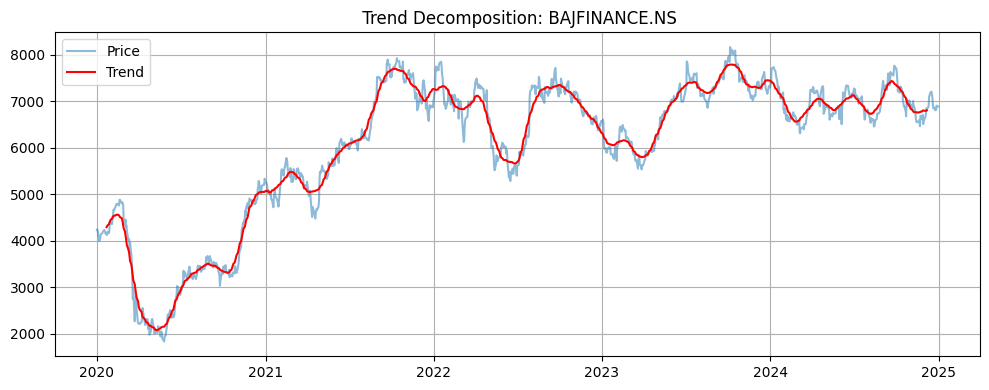

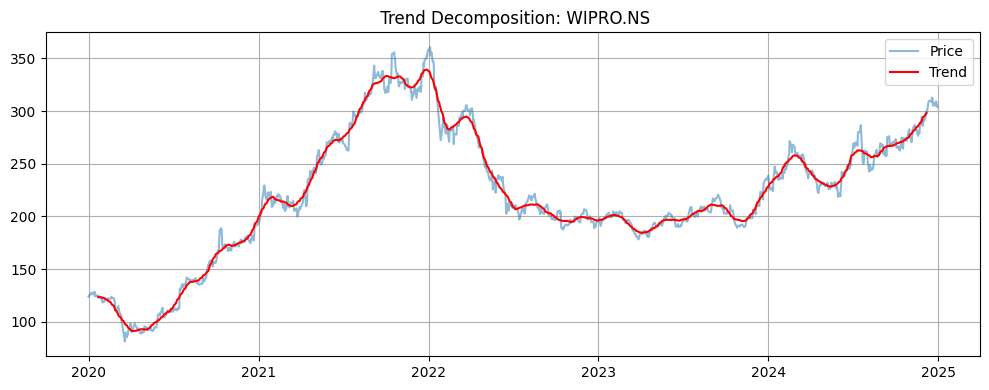

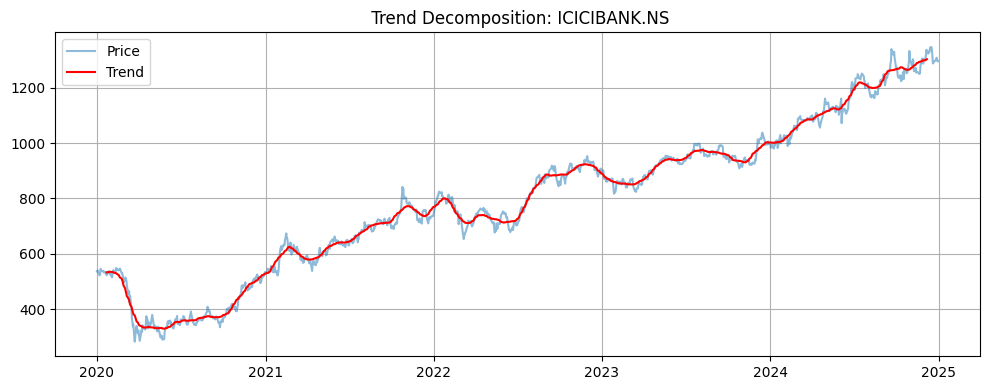

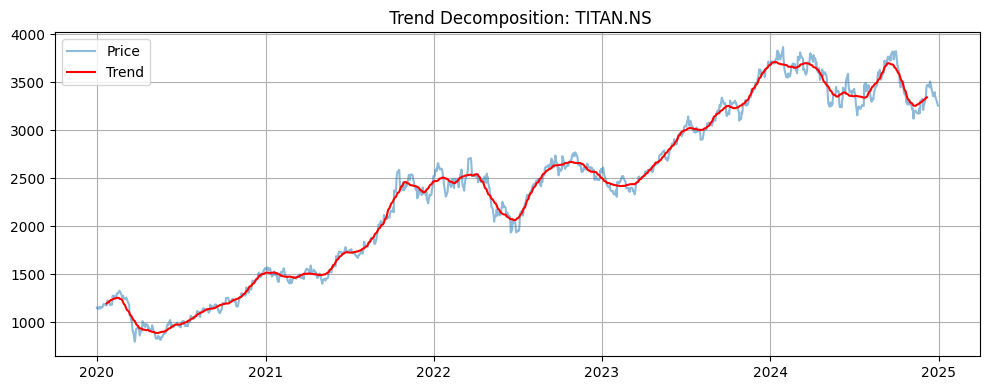

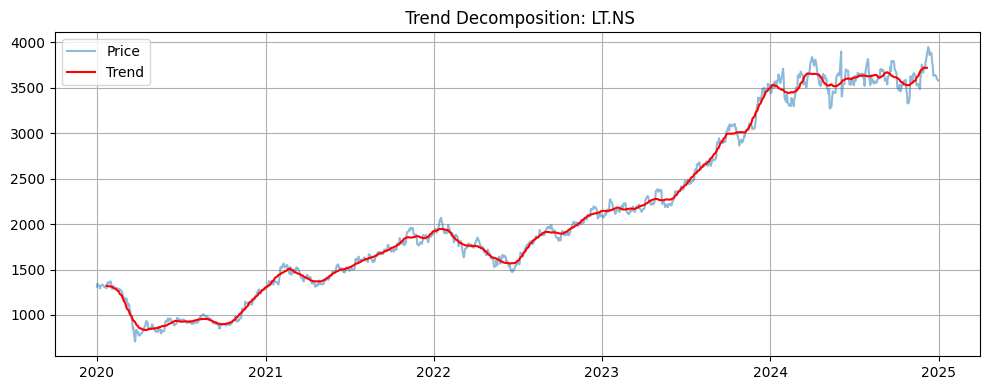

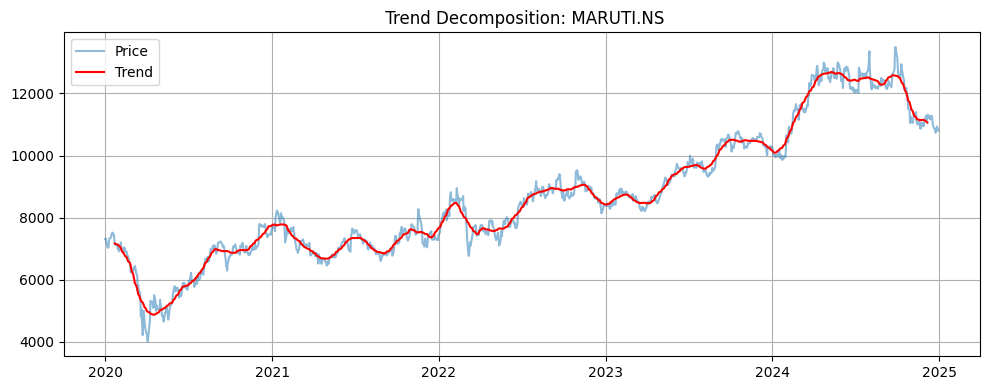

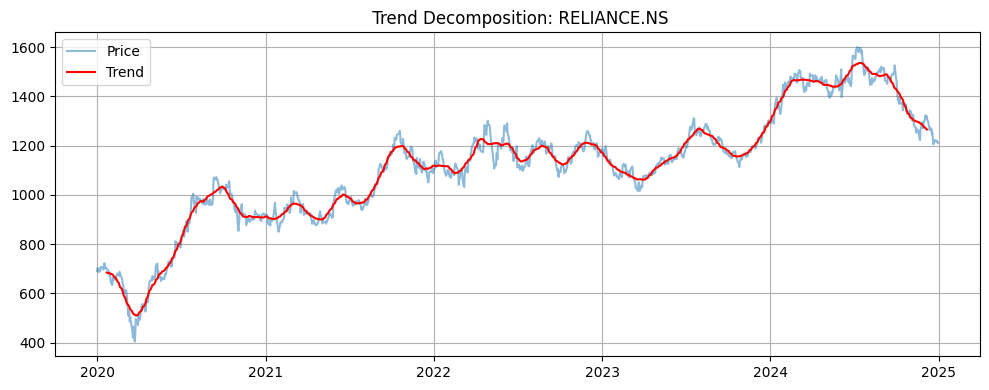

In [67]:
from statsmodels.tsa.seasonal import seasonal_decompose

trend_strengths = {}

for symbol, df in cleaned_stock_data.items():
    df = df.copy()
    result = seasonal_decompose(df["Price"], model='additive', period=30)
    trend = result.trend.dropna()


    trend_strength = trend.std() / df["Price"].std()
    trend_strengths[symbol] = trend_strength

    plt.figure(figsize=(10, 4))
    plt.plot(df.index, df["Price"], label="Price", alpha=0.5)
    plt.plot(result.trend, label="Trend", color="red")
    plt.title(f" Trend Decomposition: {symbol}")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
import numpy as np


common_symbols = set(arima_forecasts) & set(prophet_forecasts) & set(lstm_forecasts)

X_stack = []
y_stack = []
stack_index = []

for symbol in common_symbols:

    arima_pred = arima_forecasts[symbol][0].iloc[1]
    prophet_pred = prophet_forecasts[symbol][0][1]
    lstm_pred = lstm_forecasts[symbol][0][1]
    actual = prophet_forecasts[symbol][1][1]

    X_stack.append([arima_pred, prophet_pred, lstm_pred])
    y_stack.append(actual)
    stack_index.append(symbol)

X_stack = np.array(X_stack)
y_stack = np.array(y_stack)


In [69]:
print("X_stack shape:", X_stack.shape)
print("y_stack shape:", y_stack.shape)


X_stack shape: (7, 3)
y_stack shape: (7,)


In [70]:
meta_model = LinearRegression()
meta_model.fit(X_stack, y_stack)

print("Meta-learner weights:")
for model_name, coef in zip(["ARIMA", "Prophet", "LSTM"], meta_model.coef_):
    print(f"{model_name}: {coef:.3f}")


Meta-learner weights:
ARIMA: -1.395
Prophet: 5.615
LSTM: 10.091


In [71]:
stacking_forecasts = {}

for i, symbol in enumerate(stack_index):
    arima = arima_forecasts[symbol][0].iloc[1]
    prophet = prophet_forecasts[symbol][0][1]
    lstm = lstm_forecasts[symbol][0][1]

    input_features = np.array([arima, prophet, lstm]).reshape(1, -1)
    stacked_pred = meta_model.predict(input_features)[0]
    actual = y_stack[i]

    stacking_forecasts[symbol] = (stacked_pred, actual)


In [72]:
stacking_results = []

for symbol, (pred, actual) in stacking_forecasts.items():
    mape = mean_absolute_percentage_error([actual], [pred])
    rmse = np.sqrt(mean_squared_error([actual], [pred]))
    hit = int(np.sign(pred - prophet_forecasts[symbol][0][0]) == np.sign(actual - prophet_forecasts[symbol][1][0]))

    stacking_results.append({
        "Stock": symbol,
        "Model": "Stacked Ensemble",
        "MAPE": mape,
        "RMSE": rmse,
        "HitRate": hit
    })

stacking_df = pd.DataFrame(stacking_results)
results_df = pd.concat([results_df, stacking_df], ignore_index=True)

In [73]:

stacked_returns = {}

for symbol in stacking_forecasts:
    pred_price = stacking_forecasts[symbol][0]
    base_price = prophet_forecasts[symbol][0][0]

    stacked_returns[symbol] = (pred_price - base_price) / base_price


In [74]:

total = sum(stacked_returns.values())
stacked_weights = {s: r / total for s, r in stacked_returns.items()}


In [75]:
print("Final Stacked Ensemble Portfolio Weights:")
for s, w in stacked_weights.items():
    print(f"{s}: {w:.2%}")


Final Stacked Ensemble Portfolio Weights:
RELIANCE.NS: -0.85%
ICICIBANK.NS: 1.19%
LT.NS: -0.54%
TITAN.NS: 0.30%
WIPRO.NS: 99.22%
BAJFINANCE.NS: 0.47%
MARUTI.NS: 0.20%


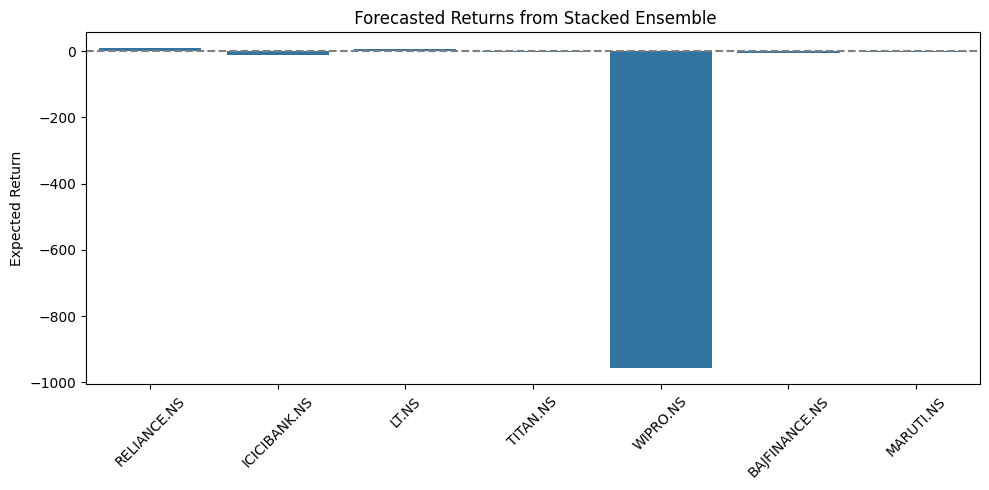

In [76]:
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.barplot(x=list(stacked_returns.keys()), y=list(stacked_returns.values()))
plt.axhline(0, color='gray', linestyle='--')
plt.title(" Forecasted Returns from Stacked Ensemble")
plt.ylabel("Expected Return")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [77]:

forecast_returns = {}

for symbol, (pred_price, _) in stacking_forecasts.items():
    base_price = prophet_forecasts[symbol][0][0]
    ret = (pred_price - base_price) / base_price

    forecast_returns[symbol] = ret


total_ret = sum(forecast_returns.values())
forecast_weights = {s: r / total_ret for s, r in forecast_returns.items()}

print("Forecast-Guided Weights:")
for s, w in forecast_weights.items():
    print(f"{s}: {w:.2%}")


Forecast-Guided Weights:
RELIANCE.NS: -0.85%
ICICIBANK.NS: 1.19%
LT.NS: -0.54%
TITAN.NS: 0.30%
WIPRO.NS: 99.22%
BAJFINANCE.NS: 0.47%
MARUTI.NS: 0.20%


In [78]:

volatility_scores = {
    symbol: volatility_data[symbol]["Rolling Volatility"].iloc[-1]
    for symbol in forecast_weights.keys()
}

inv_vol = {s: 1/v if v > 0 else 0 for s, v in volatility_scores.items()}
total_inv = sum(inv_vol.values())
vol_weights = {s: v / total_inv for s, v in inv_vol.items()}

print("Volatility-Aware Weights:")
for s, w in vol_weights.items():
    print(f"{s}: {w:.2%}")


Volatility-Aware Weights:
RELIANCE.NS: 13.96%
ICICIBANK.NS: 17.31%
LT.NS: 12.84%
TITAN.NS: 12.62%
WIPRO.NS: 13.31%
BAJFINANCE.NS: 13.95%
MARUTI.NS: 16.01%


In [79]:
alpha = 0.6
combined_weights = {}

for symbol in forecast_weights:
    fw = forecast_weights[symbol]
    vw = vol_weights[symbol]
    combined_weights[symbol] = alpha * fw + (1 - alpha) * vw


total_combined = sum(combined_weights.values())
combined_weights = {s: w / total_combined for s, w in combined_weights.items()}

print("\n Final Combined Strategy Weights:")
for s, w in combined_weights.items():
    print(f"{s}: {w:.2%}")



 Final Combined Strategy Weights:
RELIANCE.NS: 5.07%
ICICIBANK.NS: 7.64%
LT.NS: 4.81%
TITAN.NS: 5.23%
WIPRO.NS: 64.86%
BAJFINANCE.NS: 5.87%
MARUTI.NS: 6.53%


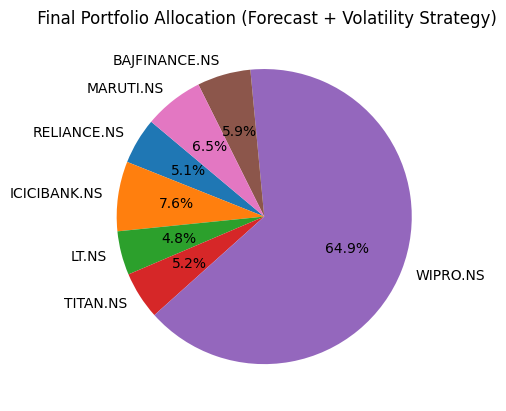

In [80]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
plt.pie(combined_weights.values(), labels=combined_weights.keys(), autopct='%1.1f%%', startangle=140)
plt.title(" Final Portfolio Allocation (Forecast + Volatility Strategy)")
plt.tight_layout()
plt.show()


In [81]:

top_n = 5
top_stocks = dict(sorted(combined_weights.items(), key=lambda x: x[1], reverse=True)[:top_n])

for symbol, weight in top_stocks.items():
    print(f"{symbol}: {weight:.2%}")


WIPRO.NS: 64.86%
ICICIBANK.NS: 7.64%
MARUTI.NS: 6.53%
BAJFINANCE.NS: 5.87%
TITAN.NS: 5.23%


In [82]:
capital = 1000000

allocations = {symbol: capital * weight for symbol, weight in top_stocks.items()}


print("\n Capital Allocation Plan:")
for symbol, amt in allocations.items():
    print(f"{symbol}: ₹{amt:,.0f}")



 Capital Allocation Plan:
WIPRO.NS: ₹648,597
ICICIBANK.NS: ₹76,368
MARUTI.NS: ₹65,250
BAJFINANCE.NS: ₹58,656
TITAN.NS: ₹52,287


In [83]:

current_prices = {
    'WIPRO.NS': 248.47,
    'ICICIBANK.NS': 1420.22,
    'MARUTI.NS': 12300.77,
    'BAJFINANCE.NS': 8830.79,
    'TITAN.NS': 3540.35
}

shares_to_buy = {
    symbol: int(allocations[symbol] // current_prices[symbol])
    for symbol in top_stocks
}

print("\n Shares to Buy:")
for s, n in shares_to_buy.items():
    print(f"{s}: {n} shares")



 Shares to Buy:
WIPRO.NS: 2610 shares
ICICIBANK.NS: 53 shares
MARUTI.NS: 5 shares
BAJFINANCE.NS: 6 shares
TITAN.NS: 14 shares


In [84]:
d ={
    "Stocks": ['WIPRO.NS', 'ICICIBANK.NS','MARUTI.NS','BAJFINANCE.NS','TITAN.NS'],
    "Quantity": [2624,52,5,6,28],
    "Avg buy price":[247.49,1420.60,12304.85,8829.26,3538.58],
    "Avg sell price":[248.65,1416.65,12278.36,8939.72,3535.55],
    "P&L":[+3043.84,-205.4,-132.45,+662.76,-84.98],
    "Return":[+0.47,-0.28,-0.22,+1.25,-0.09]
}
final_stocks = pd.DataFrame(d)
print(final_stocks)
print(f'\n Total Profit: 2346.9, Total Return +0.23%')

          Stocks  Quantity  Avg buy price  Avg sell price      P&L  Return
0       WIPRO.NS      2624         247.49          248.65  3043.84    0.47
1   ICICIBANK.NS        52        1420.60         1416.65  -205.40   -0.28
2      MARUTI.NS         5       12304.85        12278.36  -132.45   -0.22
3  BAJFINANCE.NS         6        8829.26         8939.72   662.76    1.25
4       TITAN.NS        28        3538.58         3535.55   -84.98   -0.09

 Total Profit: 2346.9, Total Return +0.23%
